In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, learning_curve, validation_curve

In [4]:
ATP_df = pd.read_csv("https://raw.githubusercontent.com/DSEI21000-S21/project-tennis-ml/main/atp_matches/atp_matches-2000-2021_expanded.csv")
ATP_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,service_points_won,first_serve_made,first_serve_won,second_serve_won,serve_game,break_point_saved,break_point_faced,player_rank,player_rank_points,target
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,...,96.0,49.0,39.0,28.0,17.0,3.0,5.0,11.0,1612.0,1
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,...,76.0,52.0,39.0,13.0,12.0,5.0,6.0,211.0,157.0,1
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,...,55.0,35.0,25.0,12.0,8.0,1.0,1.0,48.0,726.0,1
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,53.0,28.0,26.0,15.0,10.0,0.0,0.0,45.0,768.0,1
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,...,98.0,66.0,39.0,14.0,13.0,6.0,11.0,167.0,219.0,1


In [5]:
ATP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128070 entries, 0 to 128069
Data columns (total 31 columns):
tourney_id            128070 non-null object
tourney_name          128070 non-null object
surface               127674 non-null object
draw_size             128070 non-null int64
tourney_level         128070 non-null object
tourney_date          128070 non-null int64
match_num             128070 non-null int64
player_id             128070 non-null int64
player_seed           41078 non-null float64
player_entry          20407 non-null object
player_name           128070 non-null object
player_hand           128002 non-null object
player_height         111681 non-null float64
player_ioc            128070 non-null object
player_age            128042 non-null float64
score                 128070 non-null object
best_of               128070 non-null int64
round                 128070 non-null object
minutes               113442 non-null float64
ace                   116074 non-null

In [6]:
ATP_df_clean = ATP_df.drop(['tourney_id','player_name', 'player_ioc', 'score'], axis=1)
ATP_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128070 entries, 0 to 128069
Data columns (total 27 columns):
tourney_name          128070 non-null object
surface               127674 non-null object
draw_size             128070 non-null int64
tourney_level         128070 non-null object
tourney_date          128070 non-null int64
match_num             128070 non-null int64
player_id             128070 non-null int64
player_seed           41078 non-null float64
player_entry          20407 non-null object
player_hand           128002 non-null object
player_height         111681 non-null float64
player_age            128042 non-null float64
best_of               128070 non-null int64
round                 128070 non-null object
minutes               113442 non-null float64
ace                   116074 non-null float64
double_fault          116074 non-null float64
service_points_won    116074 non-null float64
first_serve_made      116074 non-null float64
first_serve_won       116074 non-

In [8]:
#Percentage of missing values
(ATP_df_clean.isna().sum() / len(ATP_df_clean))*100

tourney_name           0.000000
surface                0.309206
draw_size              0.000000
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
player_id              0.000000
player_seed           67.925353
player_entry          84.065745
player_hand            0.053096
player_height         12.796908
player_age             0.021863
best_of                0.000000
round                  0.000000
minutes               11.421879
ace                    9.366753
double_fault           9.366753
service_points_won     9.366753
first_serve_made       9.366753
first_serve_won        9.366753
second_serve_won       9.366753
serve_game             9.366753
break_point_saved      9.366753
break_point_faced      9.366753
player_rank            1.448427
player_rank_points     1.448427
target                 0.000000
dtype: float64

In [10]:
ATP_df_clean_sample = ATP_df_clean.filter(['tourney_name','draw_size','tourney_level','tourney_date','match_num','player_id', 'best_of','best_of', 'round', 'target'], axis=1)
ATP_df_clean_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128070 entries, 0 to 128069
Data columns (total 10 columns):
tourney_name     128070 non-null object
draw_size        128070 non-null int64
tourney_level    128070 non-null object
tourney_date     128070 non-null int64
match_num        128070 non-null int64
player_id        128070 non-null int64
best_of          128070 non-null int64
best_of          128070 non-null int64
round            128070 non-null object
target           128070 non-null int64
dtypes: int64(7), object(3)
memory usage: 9.8+ MB


In [11]:
# Random Seed
SEED = 42
np.random.seed = SEED

**check if the data is balance**    
target is our target variable, we want to make sure the data is balanced.

In [12]:
#check if the data is balance
ATP_df_clean_sample['target'].value_counts()

1    64035
0    64035
Name: target, dtype: int64

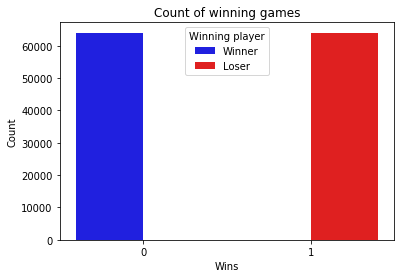

In [14]:
ax = sns.countplot(ATP_df_clean_sample['target'], hue=ATP_df_clean_sample['target'], palette=['blue', 'red'])
ax.set(xlabel='Wins', ylabel='Count')
ax.legend(title='Winning player', loc='upper center', labels=['Winner', 'Loser'])
ax.set_title('Count of winning games')
plt.show()

**Checking correlation between features**

In [19]:
clean_corr = ATP_df_clean_sample.corr()
clean_corr['target'].sort_values(ascending=False)


target          1.000000e+00
match_num       2.772944e-18
best_of         4.761817e-19
best_of         4.761817e-19
draw_size      -1.176440e-18
tourney_date   -1.543375e-17
player_id      -1.088801e-02
Name: target, dtype: float64

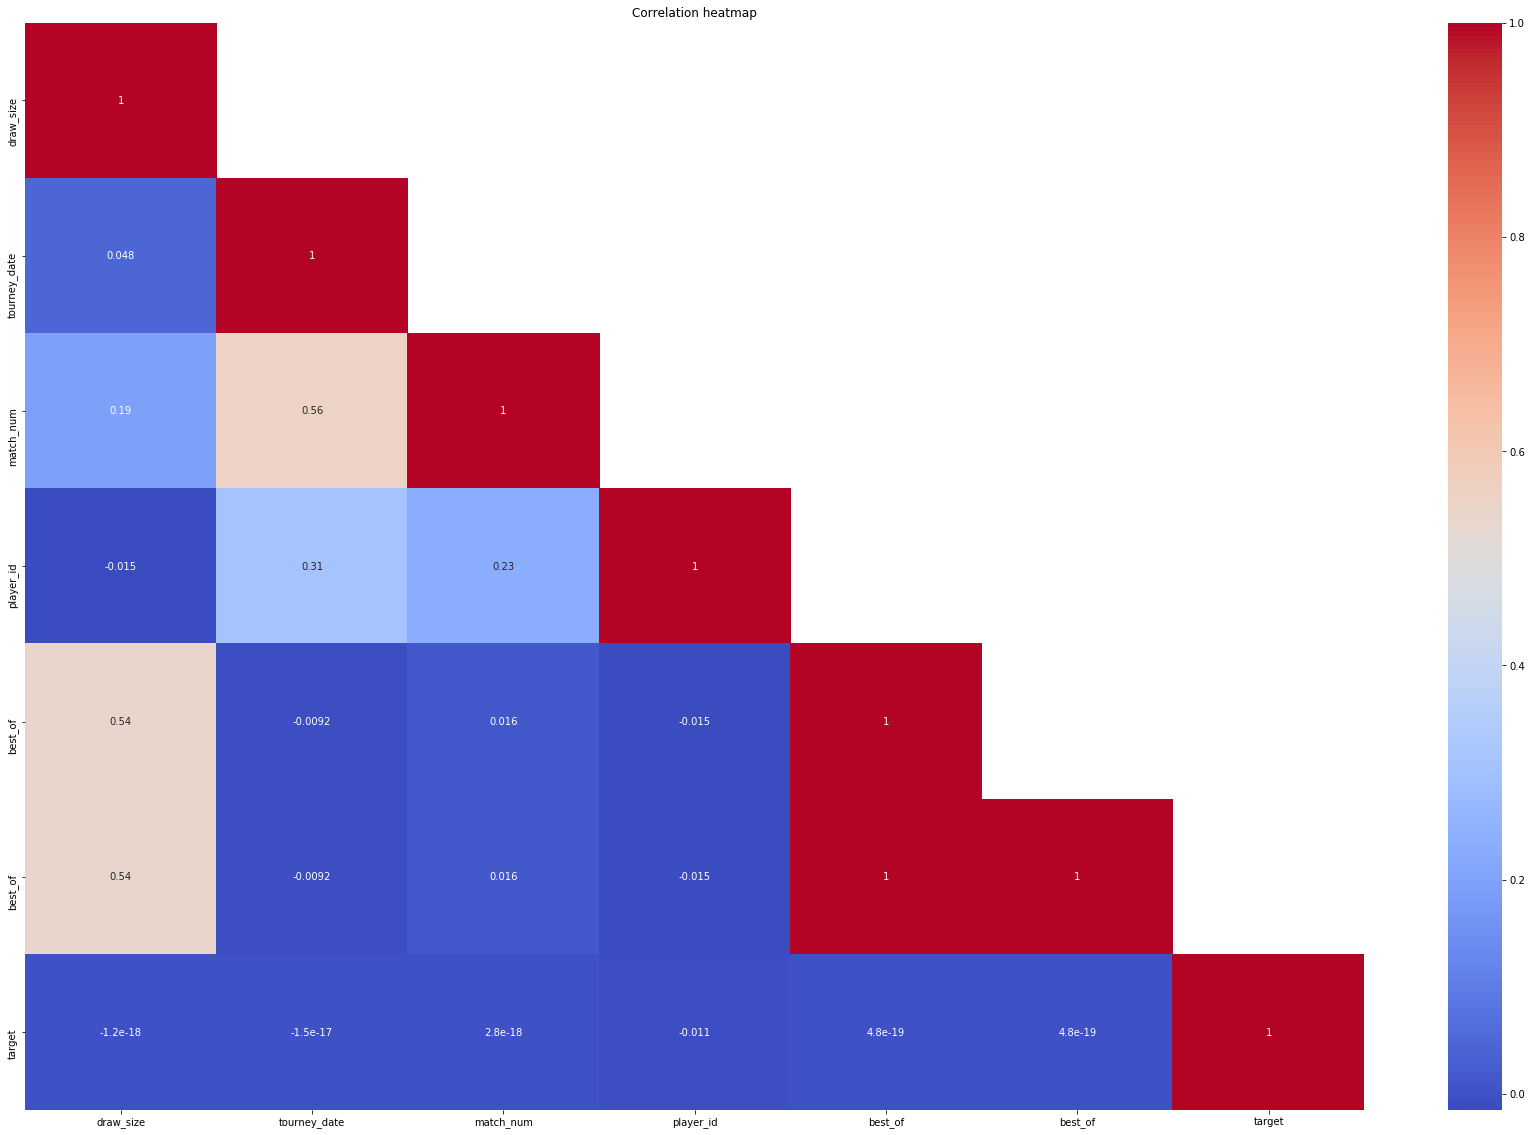

In [20]:
f, ax = plt.subplots(figsize= (30, 20))
lower = clean_corr.where(np.tril(np.ones(clean_corr.shape)).astype(np.bool))
hmap=sns.heatmap(lower,cmap="coolwarm", annot=True)
ax.set_title('Correlation heatmap')
plt.savefig('clean-corr-half.png')